In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [236]:
dftest=pd.read_excel('docterfeedatatest.xlsx')
dftrain=pd.read_excel('docterfeedatatrain.xlsx')

In [237]:
dftrain["source"]="dftrain"
dftest["source"]="dftest"
#dftest['Price']=np.nan
df=pd.concat([dftrain,dftest],ignore_index=True)
dftest.shape,dftrain.shape,df.shape

((1987, 7), (5961, 8), (7948, 8))

In [238]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,dftrain
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,dftrain
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,dftrain
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,dftrain
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,dftrain
...,...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,dftest
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,dftest
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN,dftest
7946,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,dftest


In [239]:
#lets reset the index
df.reset_index(drop=True,inplace=True)

In [240]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,dftrain
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,dftrain
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,dftrain
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,dftrain
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,dftrain
...,...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,dftest
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,dftest
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN,dftest
7946,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,dftest


In [241]:
#i think this data need a lot of string manipulation

In [242]:
#lets check the null values
df.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
source                   0
dtype: int64

In [243]:
#too many missing values in

In [244]:
#Miscellaneous_Info ,Rating,Place these column we have to fill

In [245]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

BDS                                                                                                                                                                                   632
BHMS                                                                                                                                                                                  627
BAMS                                                                                                                                                                                  624
MBBS                                                                                                                                                                                  441
MBBS, MS - ENT                                                                                                                                                                        280
                                                                      

In [246]:
#miscellaneous info is  an very important column unique to all docters so we cant fill it randomly
#Rating similarly is 
#Place

In [247]:
df["Miscellaneous_Info"].fillna("missing",inplace=True)

In [248]:
#Lets remove the"%" in Rating
df["Rating"]=df["Rating"].str.strip("%")

In [249]:
df['Profile'].value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

In [250]:
df["Rating"]=df["Rating"].astype(float)

In [251]:
df.groupby('Profile')['Rating'].mean()

Profile
Ayurveda            96.277108
Dentist             97.698454
Dermatologists      93.446281
ENT Specialist      88.973236
General Medicine    91.944238
Homeopath           96.524496
Name: Rating, dtype: float64

In [252]:
def fillratings(cols):
    Rating = cols[0]
    Profile = cols[1]
    
    if pd.isnull(Rating):

        if Profile == 'Ayurveda':
            return '96'
        elif Profile == 'Dentist':
            return '98'
        elif Profile=='Dermatologists':
            return '93'
        elif Profile=='ENT Specialist':
            return '88'
        elif Profile=='General Medicine':
            return '93'
        elif Profile=='Homeopath':
            return '96'
    else:
        return Rating

In [253]:
df['Rating']=df[['Rating','Profile']].apply(fillratings,axis=1)

In [254]:
df["Rating"]=df["Rating"].astype(int)

In [296]:
#the thing is i am filling guilty about filling it up randomly
# nobody dies on me
#humans life matter
#all for r2score

In [256]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   31
Profile                  0
Miscellaneous_Info       0
Fees                  1987
source                   0
dtype: int64

In [257]:
df['Place'].value_counts()

Andheri West, Mumbai             97
HSR Layout, Bangalore            97
Dwarka, Delhi                    93
Banjara Hills, Hyderabad         85
Mulund West, Mumbai              81
                                 ..
TV Chalai, Thiruvananthapuram     1
Cheranalloor, Ernakulam           1
Jafferkhanpet, Chennai            1
Bhandup, Mumbai                   1
Mettupalayam, Coimbatore          1
Name: Place, Length: 948, dtype: int64

In [258]:
df['Place'].fillna('Andheri West, Mumbai',limit=10,inplace=True)

In [259]:
df['Place'].fillna('HSR Layout, Bangalore',limit=10,inplace=True)

In [260]:
df['Place'].fillna('Dwarka, Delhi',limit=11,inplace=True)

In [261]:
df['Place'].value_counts()

Andheri West, Mumbai             107
HSR Layout, Bangalore            107
Dwarka, Delhi                    104
Banjara Hills, Hyderabad          85
Mulund West, Mumbai               81
                                ... 
TV Chalai, Thiruvananthapuram      1
Cheranalloor, Ernakulam            1
Jafferkhanpet, Chennai             1
Bhandup, Mumbai                    1
Mettupalayam, Coimbatore           1
Name: Place, Length: 948, dtype: int64

In [262]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info       0
Fees                  1987
source                   0
dtype: int64

In [263]:
def city(x):
    text=str(x).split(' ')
    return text[-1]

In [264]:
df['Cities']=df['Place'].apply(city)

In [266]:
df.Cities.value_counts()

Bangalore             1688
Mumbai                1618
Delhi                 1613
Hyderabad             1284
Chennai               1142
Coimbatore             298
Ernakulam              201
Thiruvananthapuram     103
e                        1
Name: Cities, dtype: int64

In [268]:
#change 'e' to banglore
def change(x):
    if x=='e':
        return 'Bangalore'
    else:
        return x

In [269]:
df['Cities']=df['Cities'].apply(change)

In [270]:
#simplicity of data

In [271]:
df['Experience'] = df['Experience'].str.replace('years experience','').astype(int)

In [272]:
# Define function to return the Feedback numbers in miscellaneous info
import re
def find_feedback(df):
    result = re.search(r' (.*?) Feedback',df)
    if result:
        return int(result.group(1))
    else:
        return 0
    
    
df['feedback_num'] = df.Miscellaneous_Info.apply(lambda x: find_feedback(x) if '%' in str(x) else 0)



In [273]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source,Cities,feedback_num
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,dftrain,Ernakulam,16
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,dftrain,Bangalore,76
2,"MBBS, MS - Otorhinolaryngology",9,88,"Mathikere - BEL, Bangalore",ENT Specialist,missing,300.0,dftrain,Bangalore,0
3,"BSc - Zoology, BAMS",12,96,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,dftrain,Bangalore,0
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,dftrain,Chennai,4
...,...,...,...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10,96,"Basavanagudi, Bangalore",Ayurveda,missing,NaN,dftest,Bangalore,0
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4,93,"Choolai, Chennai",Dermatologists,missing,NaN,dftest,Chennai,0
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9,93,"Porur, Chennai",General Medicine,missing,NaN,dftest,Chennai,0
7946,BDS,12,98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,dftest,Bangalore,0


In [274]:
#the thing is we want to get most out of this messy Miscellaneous_Info

In [275]:
df.loc[df["Fees"].isnull()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source,Cities,feedback_num
5961,MBBS,35,93,"Ghatkopar East, Mumbai",General Medicine,missing,NaN,dftest,Mumbai,0
5962,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,88,"West Marredpally, Hyderabad",ENT Specialist,missing,NaN,dftest,Hyderabad,0
5963,"MBBS, DDVL",40,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",NaN,dftest,Chennai,4
5964,BAMS,0,96,"New Ashok Nagar, Delhi",Ayurveda,missing,NaN,dftest,Delhi,0
5965,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,NaN,dftest,Bangalore,0
...,...,...,...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10,96,"Basavanagudi, Bangalore",Ayurveda,missing,NaN,dftest,Bangalore,0
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4,93,"Choolai, Chennai",Dermatologists,missing,NaN,dftest,Chennai,0
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9,93,"Porur, Chennai",General Medicine,missing,NaN,dftest,Chennai,0
7946,BDS,12,98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,dftest,Bangalore,0


In [276]:
df.drop('Place',axis=1,inplace=True) #too many valuecounts

In [277]:
df

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,source,Cities,feedback_num
0,"BHMS, MD - Homeopathy",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,dftrain,Ernakulam,16
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,dftrain,Bangalore,76
2,"MBBS, MS - Otorhinolaryngology",9,88,ENT Specialist,missing,300.0,dftrain,Bangalore,0
3,"BSc - Zoology, BAMS",12,96,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,dftrain,Bangalore,0
4,BAMS,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,dftrain,Chennai,4
...,...,...,...,...,...,...,...,...,...
7943,"BAMS, Doctor of Medicine",10,96,Ayurveda,missing,NaN,dftest,Bangalore,0
7944,"MD - Dermatology , Venereology & Leprosy, MBBS",4,93,Dermatologists,missing,NaN,dftest,Chennai,0
7945,"MBBS, MD / MS - Obstetrics & Gynaecology",9,93,General Medicine,missing,NaN,dftest,Chennai,0
7946,BDS,12,98,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,dftest,Bangalore,0


In [278]:
#lets drop the "Miscellaneous_Info" column cause it is too Miscellanous
#cause i dont know how to get more out of this column
df.drop(columns=["Miscellaneous_Info"],inplace=True)

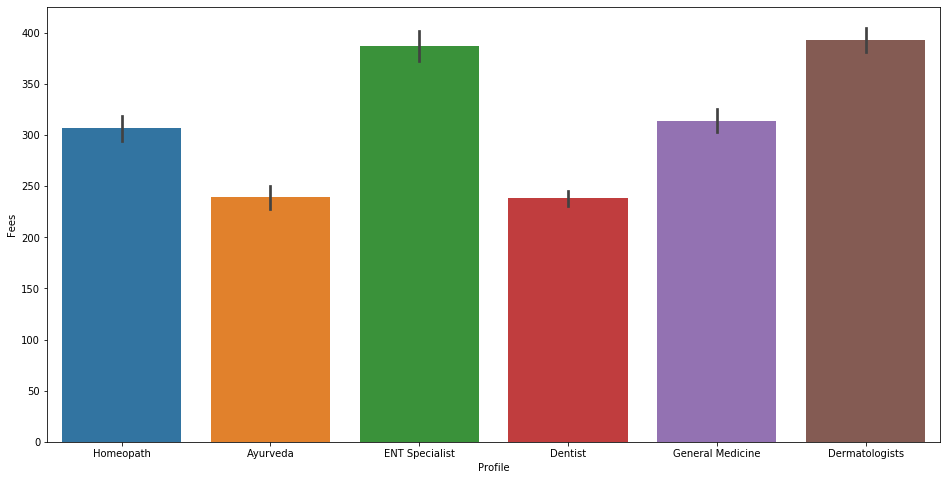

In [281]:
plt.figure(figsize=(16,8))
sns.barplot(x="Profile",y="Fees",data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

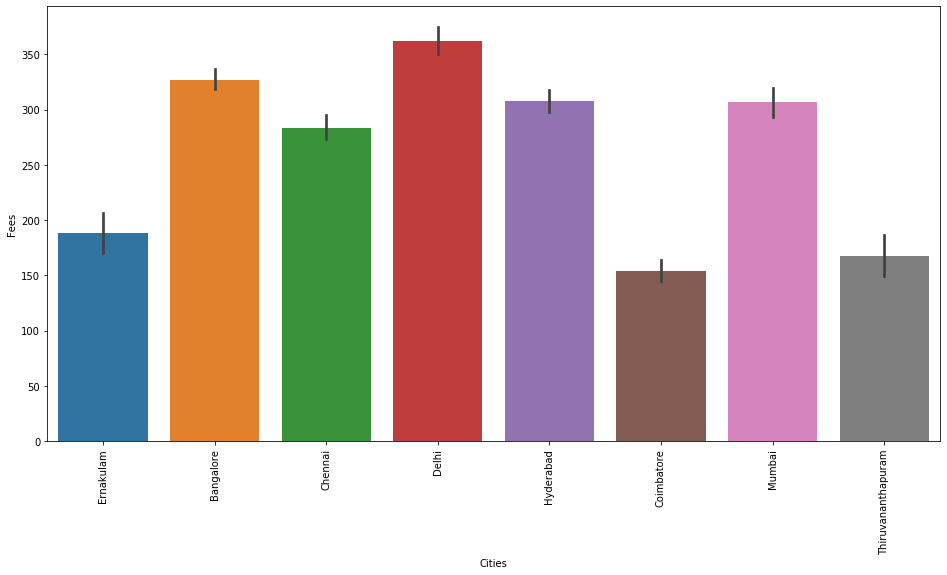

In [280]:
plt.figure(figsize=(16,8))
sns.barplot(x="Cities",y="Fees",data=df)
plt.xticks(rotation = 90)

In [282]:
#needed more data cleaning :(


In [283]:
df.dtypes

Qualification     object
Experience         int32
Rating             int32
Profile           object
Fees             float64
source            object
Cities            object
feedback_num       int64
dtype: object

In [284]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=LabelEncoder().fit_transform(df[col])

In [285]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Profile', 'Fees', 'source',
       'Cities', 'feedback_num'],
      dtype='object')

# Machine learning for regression

# 

In [286]:
#lets seprate test and train data
df_train=df.loc[df["source"]==1]
df_test=df.loc[df["source"]==0]

In [287]:
#Resetting the index
df_test.reset_index(drop=True,inplace=True)

In [288]:
#Dropping the source column
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

In [289]:
#Lets separate the input and output from train dataset
df_x=df_train.drop(columns=["Fees"])
y=df_train[["Fees"]]

In [290]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [291]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [292]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [293]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_reg=GradientBoostingRegressor()
reg = GridSearchCV(gb_reg, parameters, cv=5,scoring="r2")
reg.fit(x,y)
reg.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [299]:
gb_reg=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
maxr2_score(gb_reg,x,y)

r2 score corresponding to  42  is  0.19873468390709548
r2 score corresponding to  43  is  0.19194239278833647
r2 score corresponding to  44  is  0.2264544036856837
r2 score corresponding to  45  is  0.2037511914619553
r2 score corresponding to  46  is  0.17848323425608625
r2 score corresponding to  47  is  0.17653545696535466
r2 score corresponding to  48  is  0.19400332613453397
r2 score corresponding to  49  is  0.2051776229404344
r2 score corresponding to  50  is  0.1784644694814681
r2 score corresponding to  51  is  0.17608145412037124
r2 score corresponding to  52  is  0.14689013504083825
r2 score corresponding to  53  is  0.18299899619666904
r2 score corresponding to  54  is  0.18993123422272262
r2 score corresponding to  55  is  0.190223247206316
r2 score corresponding to  56  is  0.1885704253951267
r2 score corresponding to  57  is  0.19062975244700864
r2 score corresponding to  58  is  0.1523487540845514
r2 score corresponding to  59  is  0.21219190148450717
r2 score correspon

63

In [228]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,150,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [295]:
# Random forest using n_estimators=500 
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=500)
maxr2_score(rfr,x,y)

r2 score corresponding to  42  is  0.09627174434530128
r2 score corresponding to  43  is  0.0673382732271891
r2 score corresponding to  44  is  0.1116395588328114
r2 score corresponding to  45  is  0.09203532328695685
r2 score corresponding to  46  is  0.0669490635704546
r2 score corresponding to  47  is  0.0828311604091494
r2 score corresponding to  48  is  0.08883313430354889
r2 score corresponding to  49  is  0.09274562208666703
r2 score corresponding to  50  is  0.04966633033741974
r2 score corresponding to  51  is  0.090684803478154
r2 score corresponding to  52  is  0.0373764267811052
r2 score corresponding to  53  is  0.06993373820823467
r2 score corresponding to  54  is  0.05338547710017261
r2 score corresponding to  55  is  0.09928257555986897
r2 score corresponding to  56  is  0.06689096992230381
r2 score corresponding to  57  is  0.1071035014698426
r2 score corresponding to  58  is  0.023516547163126456
r2 score corresponding to  59  is  0.12000443121430848
r2 score correspo

63

In [297]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 29}

In [298]:
knr=KNeighborsRegressor(n_neighbors=29)
maxr2_score(knr,x,y)

r2 score corresponding to  42  is  0.1695634245563119
r2 score corresponding to  43  is  0.1201698534111647
r2 score corresponding to  44  is  0.19343033932207954
r2 score corresponding to  45  is  0.15567289387376604
r2 score corresponding to  46  is  0.14656501818754264
r2 score corresponding to  47  is  0.12701218955712223
r2 score corresponding to  48  is  0.13995578918006601
r2 score corresponding to  49  is  0.1583992399598546
r2 score corresponding to  50  is  0.1452481271582251
r2 score corresponding to  51  is  0.13081995322387374
r2 score corresponding to  52  is  0.09013446646913648
r2 score corresponding to  53  is  0.15540427333666107
r2 score corresponding to  54  is  0.15441534642006038
r2 score corresponding to  55  is  0.14161845278307417
r2 score corresponding to  56  is  0.13407709863588624
r2 score corresponding to  57  is  0.15659570347880358
r2 score corresponding to  58  is  0.10619816653412073
r2 score corresponding to  59  is  0.16917602563300915
r2 score corre

63

In [300]:
#lets choose our final model
#gradient boost

In [301]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 48,test_size=0.20)
gb_reg=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
gb_reg.fit(x_train,y_train)
y_pred=gb_reg.predict(x_test)

In [302]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  176.2749787619931
r2_score is:  0.19385414192198747


In [305]:
#miscellanous